In [ ]:

import matplotlib
from MatModels import *

In [ ]:
G = 6.67e-11
masa_tierra = 5.97e24
masa_luna = 7.35e22


$$m_n\frac{d^2y}{dt^2}= -G \frac{m_n m_T}{d^2_{nT}}\widehat{X}$$

$$\widehat{X} = \frac{\overrightarrow{X}}{\sqrt{x_i^2 + x_j^2}}$$

In [ ]:
# t -> tiempo escalar
# ci -> [[xi, xj], [vi, vj]]
    

In [ ]:
posicion_nave = np.array([5, -15])
velocidad_nave = np.array([0, 0])

In [ ]:
t0 = 0
tf = 13500
dt = 0.1


In [ ]:
#resolver el modelo y graficar la trayectoria de la nave
# t-> tiempo escalar , ci -> vecPosInicial (xi,xj) , velocidad -> (vi,vj)
# ci-> [[ , ][ , ]]
def modeloNave(t,ci):
  vectorTierra = -ci[0] # vector xi xj
  distanceTierra = np.sqrt(vectorTierra[0]**2 + vectorTierra[1]**2)
  dvdt = G*(masa_tierra/distanceTierra ** 3)* vectorTierra
  dydt = ci[1]

  return np.array([dydt, dvdt])
  


In [ ]:
posNave = np.array([15e6, 1e6])
velNave = np.array([2e3, 4e3])
ci = np.array([posNave,velNave])
t0 = 0 
tf = 13500 #horas 
dt  = 0.1 


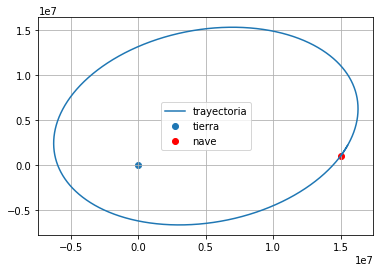

In [ ]:
Y, t = getRungeKutta(t0, tf, ci, modeloNave,dt)
Y.shape

Y[:,0][:,0], Y[:,0][:,1]


plt.plot(Y[:,0][:,0], Y[:,0][:,1],label="trayectoria") # [xi] , [xj]
plt.scatter(0,0,label = "tierra")
plt.scatter(15e6,1e6, c="red" , label = "nave")
plt.legend()
plt.grid()


$$x = d_{luna} \cos( \frac{2\pi t}{T})$$

$$y = d_{luna} \sin( \frac{2\pi t}{T})$$

$T$ periodo

In [ ]:
distancia_luna = 384e6 # m
# crear funcion que dado un tiempo t, devuelva la posicion de la luna

$$m_n\frac{d^2y}{dt^2}= -G \frac{m_n m_T}{d^2_{nT}}\widehat{X_n}- G \frac{m_n m_L}{d^2_{nT}}(\widehat{X_L}-\widehat{X_n})$$

$$\widehat{X} = \frac{\overrightarrow{X}}{\sqrt{x_i^2 + x_j^2}}$$


In [ ]:
# Crear
# tiempo que tarda en dar la vuelta
T=97200    #27*24/24*3600

def getPosLuna(t):
    theta=2*np.pi*t/T
    posx=distancia_luna*np.cos(theta)
    posy=distancia_luna*np.sin(theta)
    return np.array([posx,posy])

In [ ]:
t = np.linspace(0,T,100)
orbita=getPosLuna(t)



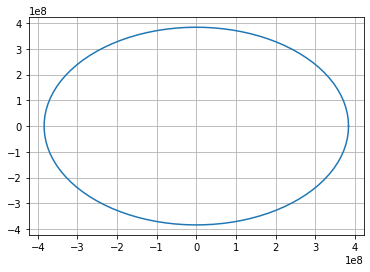

In [ ]:
plt.plot(orbita[0,:], orbita[1,:])
plt.grid()
plt.show()

In [ ]:
#G = 6.67e-11
#masa_tierra = 5.97e24
#masa_luna = 7.35e22

# np.linalg.norm (modulo vector unitario)

In [ ]:
def modeloNaveLuna(t,ci):
    VectorTierra=-ci[0]
    posLuna=getPosLuna(t)
    VectorLuna=posLuna-ci[0]
    dvdt=G*(VectorTierra*masa_tierra/np.linalg.norm(VectorTierra)**3+masa_luna*VectorLuna/np.linalg.norm(VectorLuna)**3)
    dydt=ci[1]
    return np.array([dydt,dvdt])
  

In [ ]:

  
posNave = np.array([15e6, 1e6])
velNave = np.array([2e3, 4e3])
ci = np.array([posNave,velNave])
t0 = 0 
tf = 97200 #horas 
dt  = 0.1 


/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


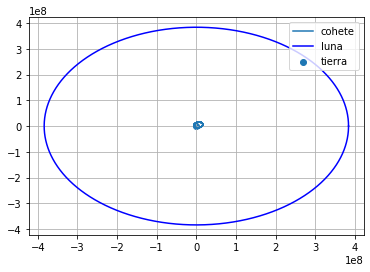

In [ ]:
Y, t = getRungeKutta(0,tf, ci, modeloNaveLuna,dt)

orbita=getPosLuna(t)

plt.plot(Y[:,0][:,0], Y[:,0][:,1],label="cohete") # [xi] , [xj]
plt.plot(orbita[0,:],orbita[1,:],label="luna",color="blue")
plt.scatter(0,0,label = "tierra")


plt.legend()
plt.grid()